# Exploratory Data Analysis

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from data_augmentation import *

## Before Data Augmentation

### Loadind Data

In [2]:
# Read CSV file into DataFrame
df = pd.read_csv('data/driving_log.csv')
df.head()

center_camera  \
0  C:\Users\crist\OneDrive\Documentos\Projects\Gi...   
1  C:\Users\crist\OneDrive\Documentos\Projects\Gi...   
2  C:\Users\crist\OneDrive\Documentos\Projects\Gi...   
3  C:\Users\crist\OneDrive\Documentos\Projects\Gi...   
4  C:\Users\crist\OneDrive\Documentos\Projects\Gi...   

                                         left_camera  \
0   C:\Users\crist\OneDrive\Documentos\Projects\G...   
1   C:\Users\crist\OneDrive\Documentos\Projects\G...   
2   C:\Users\crist\OneDrive\Documentos\Projects\G...   
3   C:\Users\crist\OneDrive\Documentos\Projects\G...   
4   C:\Users\crist\OneDrive\Documentos\Projects\G...   

                                        right_camera  steering_angle  \
0   C:\Users\crist\OneDrive\Documentos\Projects\G...             0.0   
1   C:\Users\crist\OneDrive\Documentos\Projects\G...             0.0   
2   C:\Users\crist\OneDrive\Documentos\Projects\G...             0.0   
3   C:\Users\crist\OneDrive\Documentos\Projects\G...             0.0   
4   C:\Users\crist\OneDrive\Documentos\Projects\G...             0.0   

   throttle  reverse     speed  
0       0.0        0  0.000078  
1       0.0        0  0.000081  
2       0.0        0  0.000078  
3       0.0        0  0.000078  
4       0.0        0  0.000080

### Basic Description of the Data

In [3]:
# Identification of data types
df.dtypes

center_camera      object
left_camera        object
right_camera       object
steering_angle    float64
throttle          float64
reverse             int64
speed             float64
dtype: object

In [4]:
# Size of dataset
df.shape

(4573, 7)

### Target Variable Countplot

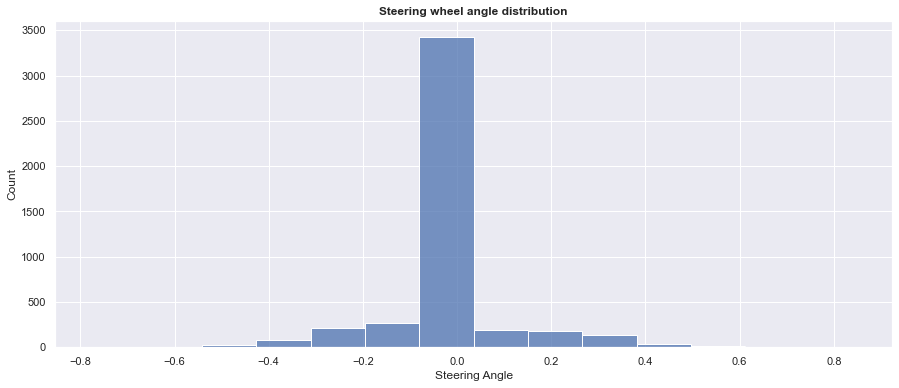

In [5]:
# Adjust figure size
plt.figure(figsize = (15, 6))

# Set darkgrid style for all matplotlib and seaborn plots
sns.set_theme(style = "darkgrid")

# steering_angle variable distribution
sns.histplot(data = df, x = 'steering_angle')

# Adjust graph title and labels title
plt.title('Steering wheel angle distribution', fontweight = 'bold')
plt.xlabel('Steering Angle')
plt.ylabel('Count')
plt.show()

### Sample Image from Each Camera

(-0.5, 319.5, 159.5, -0.5)

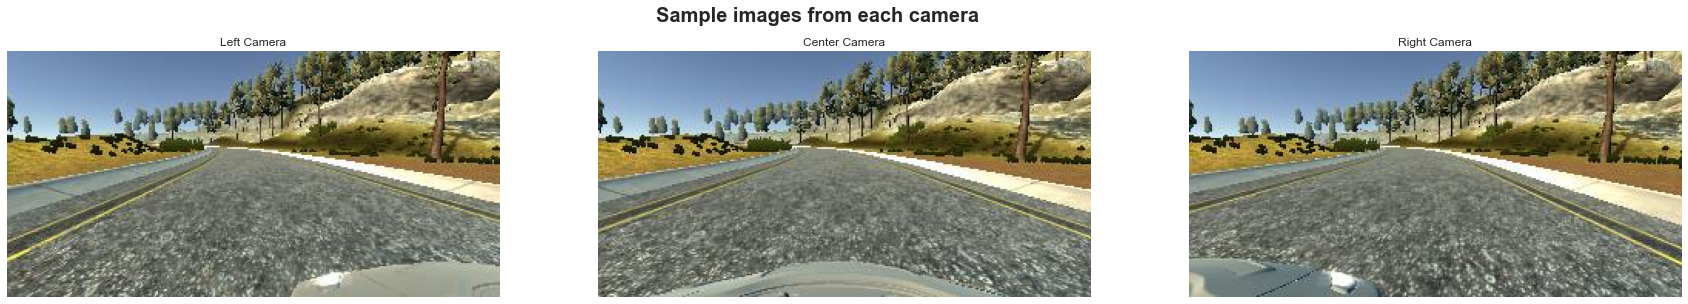

In [6]:
randint = np.random.randint(len(df), size = 1)[0]

# Adjust figures size
plt.figure(figsize = (30, 30))

# Main title for all image subplots
plt.suptitle('Sample images from each camera', fontweight = 'bold', fontsize = 20, y = 0.58)

# Show left camera sample image
left_cam = cv2.imread(df.iloc[randint]['left_camera'].strip())
left_cam = cv2.cvtColor(left_cam, cv2.COLOR_BGR2RGB)
plt.subplot(1, 3, 1)
plt.imshow(left_cam)
plt.title('Left Camera')
plt.grid(False)
plt.axis('off')

# Show center camera sample image
center_cam = cv2.imread(df.iloc[randint]['center_camera'].strip())
center_cam = cv2.cvtColor(center_cam, cv2.COLOR_BGR2RGB)
plt.subplot(1, 3, 2)
plt.imshow(center_cam)
plt.title('Center Camera')
plt.grid(False)
plt.axis('off')

# Show left camera sample image
right_cam = cv2.imread(df.iloc[randint]['right_camera'].strip())
right_cam = cv2.cvtColor(right_cam, cv2.COLOR_BGR2RGB)
plt.subplot(1, 3, 3)
plt.imshow(right_cam)
plt.title('Right Camera')
plt.grid(False)
plt.axis('off')

## After Data Augmentation

### Horizontal Flip

(-0.5, 319.5, 159.5, -0.5)

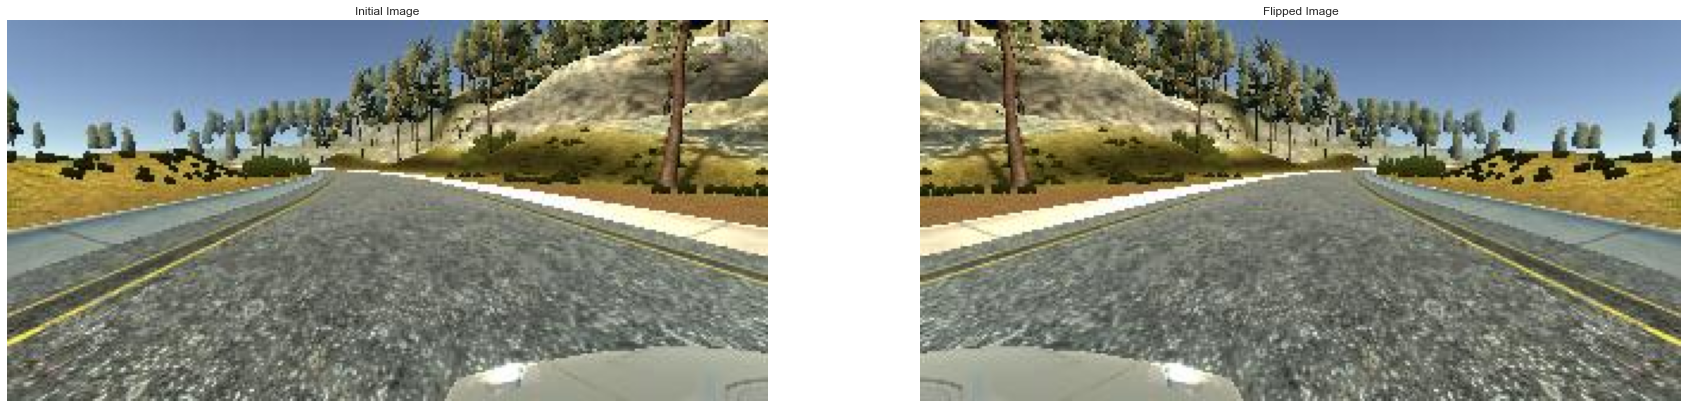

In [7]:
# Adjust figures size
plt.figure(figsize = (30, 30))

# Initial image
left_cam = cv2.imread(df.iloc[randint]['left_camera'].strip())
left_cam = cv2.cvtColor(left_cam, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(left_cam)
plt.title('Initial Image')
plt.grid(False)
plt.axis('off')

# Flipped image
flipped_image = horizontal_flip(left_cam, df.iloc[randint]['steering_angle'])
plt.subplot(1, 2, 2)
plt.imshow(flipped_image[0])
plt.title('Flipped Image')
plt.grid(False)
plt.axis('off')

### Brightness Modification

(-0.5, 319.5, 159.5, -0.5)

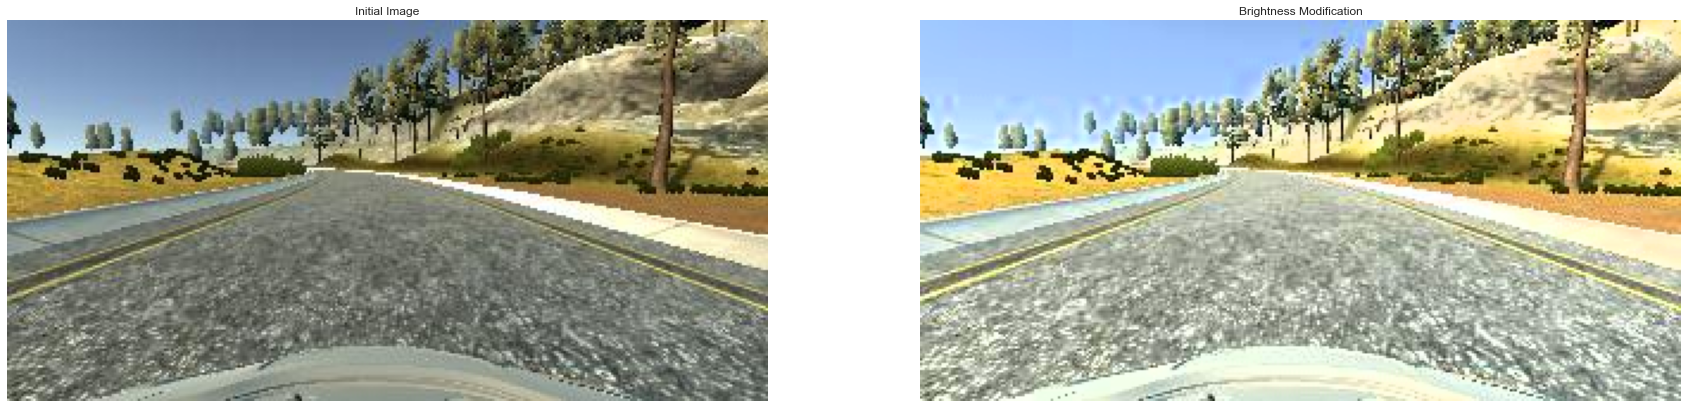

In [8]:
# Adjust figures size
plt.figure(figsize = (30, 30))

# Initial image
center_cam = cv2.imread(df.iloc[randint]['center_camera'].strip())
center_cam = cv2.cvtColor(center_cam, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(center_cam)
plt.title('Initial Image')
plt.grid(False)
plt.axis('off')

# Brightness modification 
ba_image = brightness_modification(center_cam)
ba_image = cv2.cvtColor(ba_image, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 2)
plt.imshow(ba_image)
plt.title('Brightness Modification')
plt.grid(False)
plt.axis('off')

### Translation

(-0.5, 319.5, 159.5, -0.5)

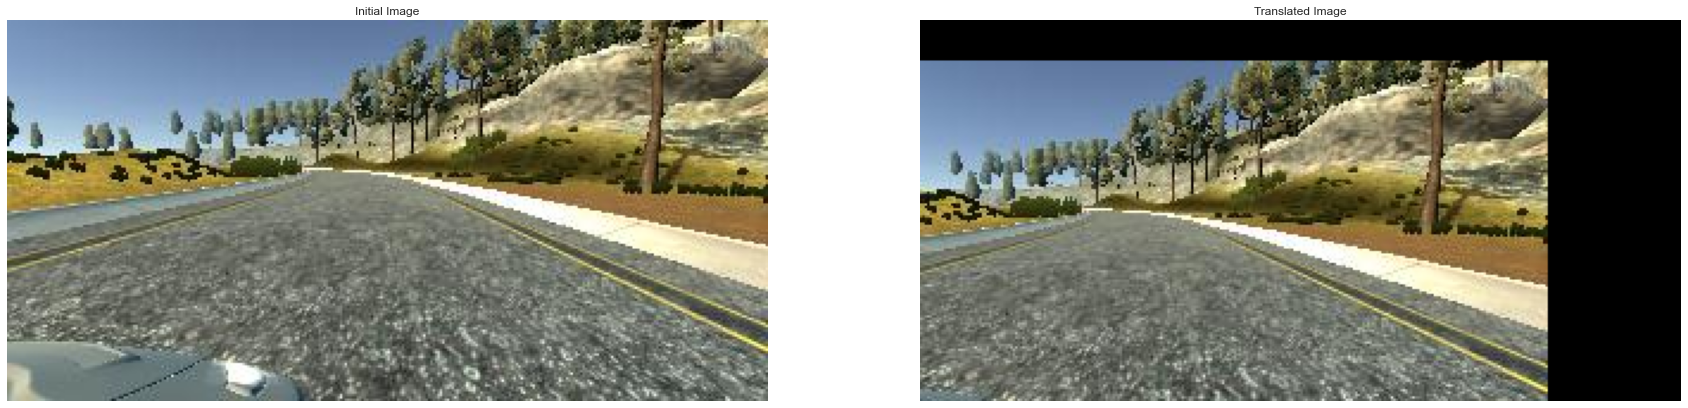

In [9]:
# Adjust figures size
plt.figure(figsize = (30, 30))

# Initial image
right_cam = cv2.imread(df.iloc[randint]['right_camera'].strip())
right_cam = cv2.cvtColor(right_cam, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(right_cam)
plt.title('Initial Image')
plt.grid(False)
plt.axis('off')

# Translation 
translated_image = translation(right_cam, df.iloc[randint]['steering_angle'])
plt.subplot(1, 2, 2)
plt.imshow(translated_image[0])
plt.title('Translated Image')
plt.grid(False)
plt.axis('off')

### Cropping

(-0.5, 319.5, 94.5, -0.5)

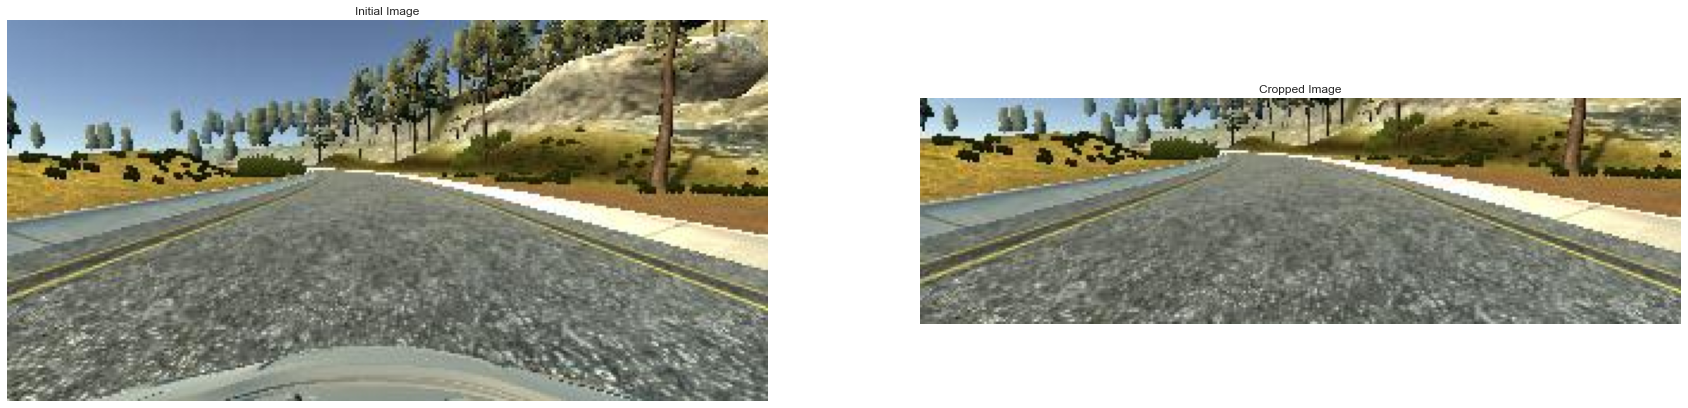

In [10]:
# Adjust figures size
plt.figure(figsize = (30, 30))

# Initial image
center_cam = cv2.imread(df.iloc[randint]['center_camera'].strip())
center_cam = cv2.cvtColor(center_cam, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(center_cam)
plt.title('Initial Image')
plt.grid(False)
plt.axis('off')

# Cropped Image
cropped_image = top_bottom_crop(center_cam)
plt.subplot(1, 2, 2)
plt.imshow(cropped_image)
plt.title('Cropped Image')
plt.grid(False)
plt.axis('off')